# **EV Market Size Analysis**


In [32]:
#importing important dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
ev_data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [34]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [35]:
ev_data.shape

(177866, 17)

In [36]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [37]:
ev_data.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177865,5YJ3E1EA8M,Pierce,Tacoma,WA,98422.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,211464683,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


In [38]:
ev_data.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [39]:
# Since there is a less no of columns with null info
ev_data = ev_data.dropna()

In [40]:
ev_data.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [41]:
ev_data.shape


(177473, 17)

# EV Adoption Over Time (Visualizing through graph)

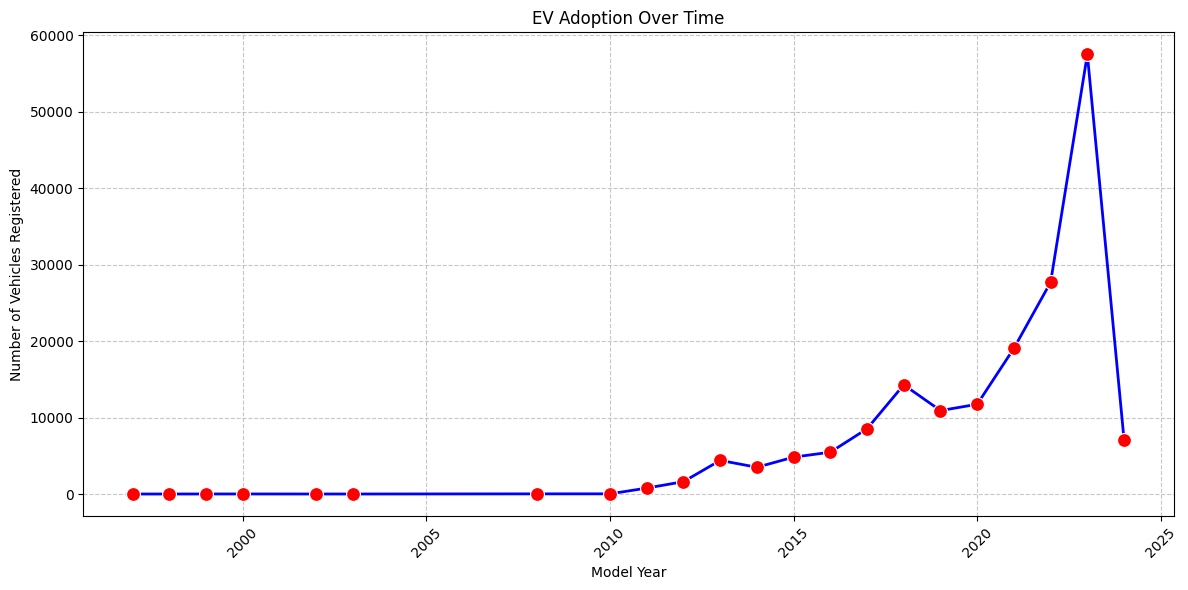

In [42]:
# Analyzing the growth of the EV population by model year
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.lineplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, marker="o", color="b", lw=2)
sns.scatterplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, s=100, color="r", zorder=5)

plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Geographical Distribution of a EV (Visualization through Stripplot)

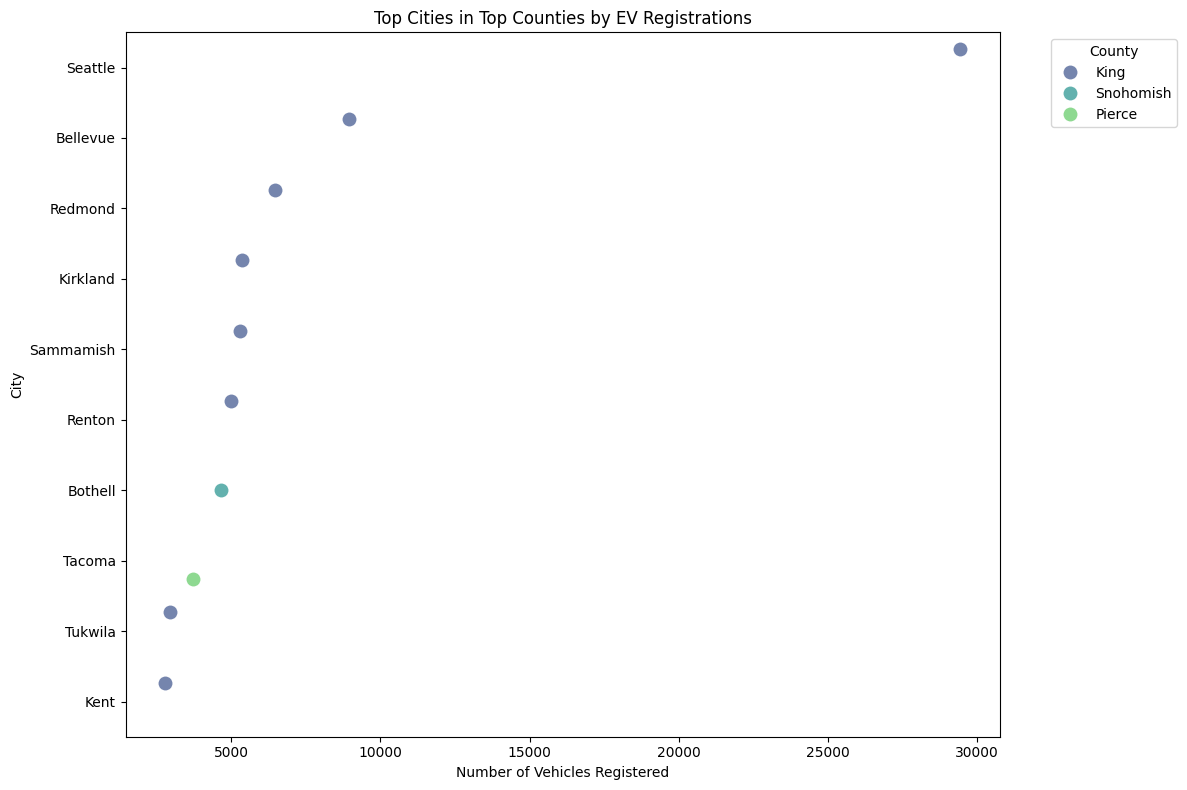

In [43]:
# Top countries and cities with EV registrations
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index
top_counties_data = ev_data[ev_data['County'].isin(top_counties)] # Filtering data for these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().reset_index(name='Number of Vehicles') # Aggregating the number of EVs by City and County
top_cities = ev_city_distribution_top_counties.nlargest(10, 'Number of Vehicles') # Selecting the top 10 cities with the most EV registrations

plt.figure(figsize=(12, 8))
sns.stripplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, jitter=True, dodge=True, size=10, palette="viridis", alpha=0.7)
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# EV Types: (Comparing BEV and PHEV using Barplot)

<ipython-input-44-d50b1fccad66>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket" ,width=0.4)


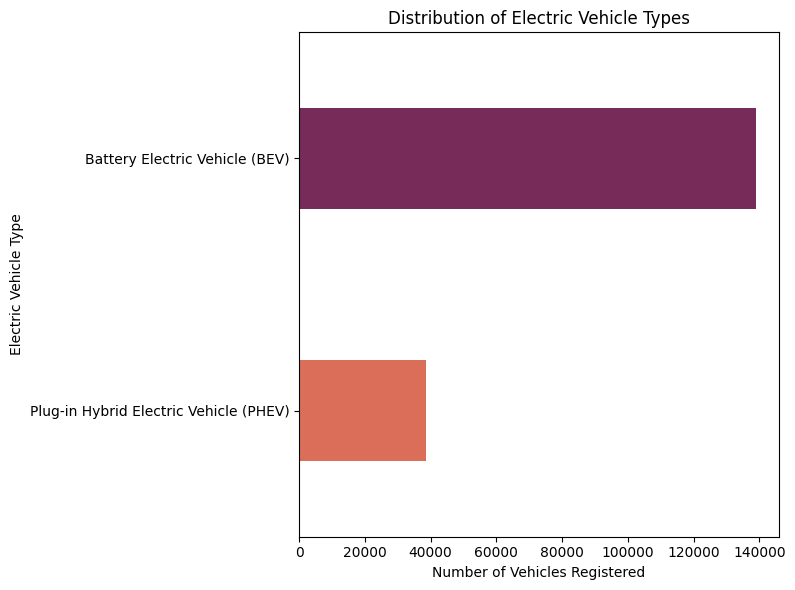

In [44]:
# Breakdown of the dataset by electric vehicle type (BEV, etc.).
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket" ,width=0.4)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

## Make and Model Popularity: Visualizing through Barplot


<ipython-input-27-95863a7cee92>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix" , width = 0.6)


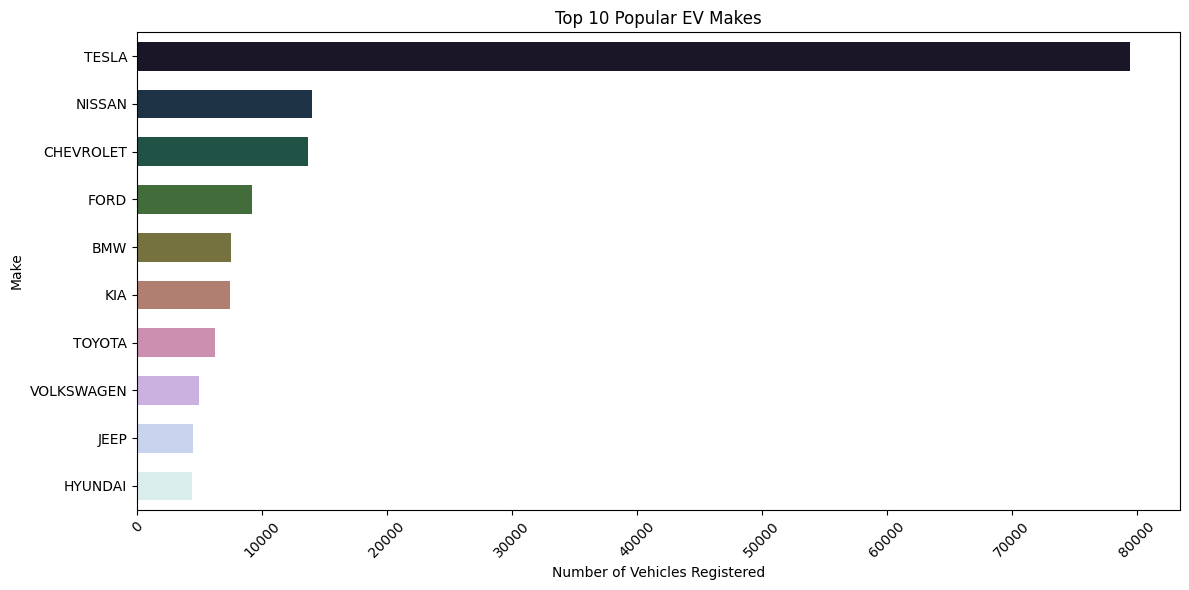

In [27]:
# Identifying the most popular makes and models among the registered EVs.
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix" , width = 0.6)
plt.xticks(rotation=45)
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

## Electric Range Analysis

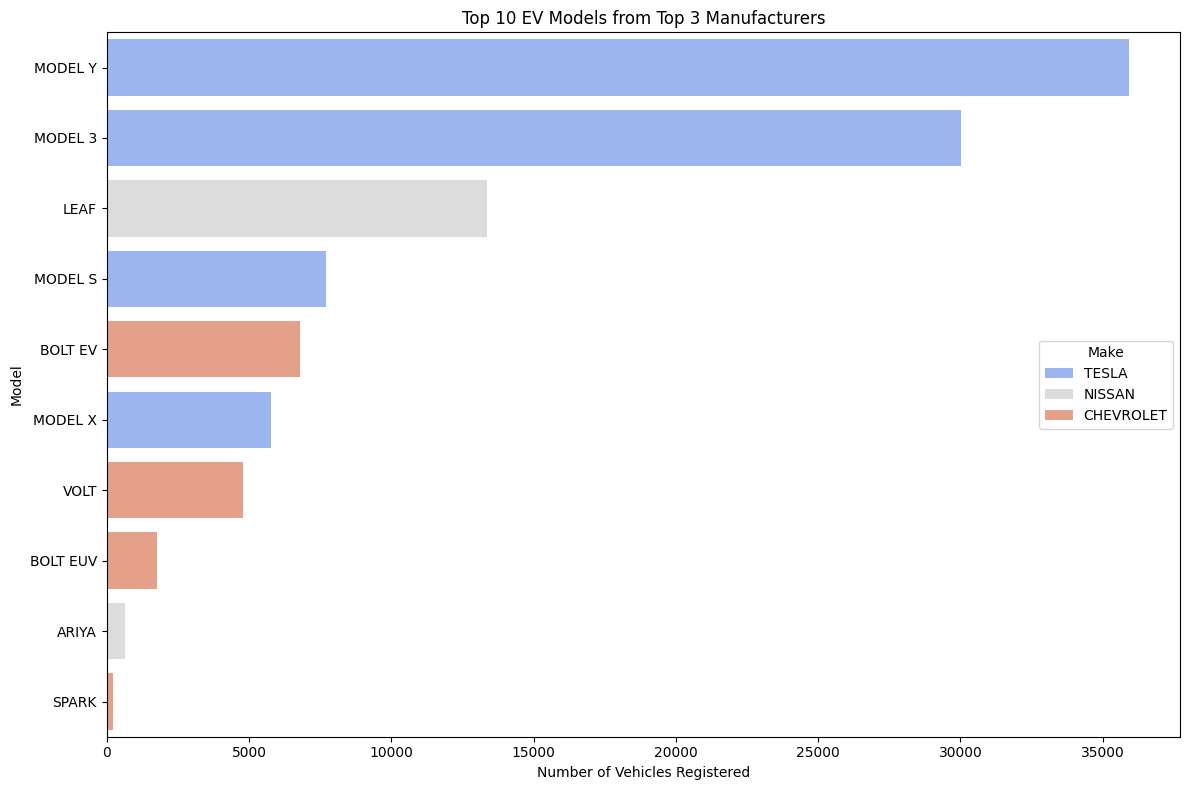

In [28]:
# Analyzing the electric range of vehicles to see how EV technology is progressing.

# Top 3 Manufacturers by EV Registration
top_3_makes = ev_make_distribution.head(3).index
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)] # Filtering the dataset for the top manufacturers
plt.figure(figsize=(12, 8)) # Visualizing the top 10 models across these manufacturers using a countplot
top_models_sorted = top_makes_data['Model'].value_counts().nlargest(10).index
sorted_data = top_makes_data[top_makes_data['Model'].isin(top_models_sorted)] ## Sorting the data to display the most popular models


sns.countplot(y='Model', hue='Make', data=sorted_data, order=top_models_sorted, palette="coolwarm")

plt.title('Top 10 EV Models from Top 3 Manufacturers')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()


## Electric Range Analysis:

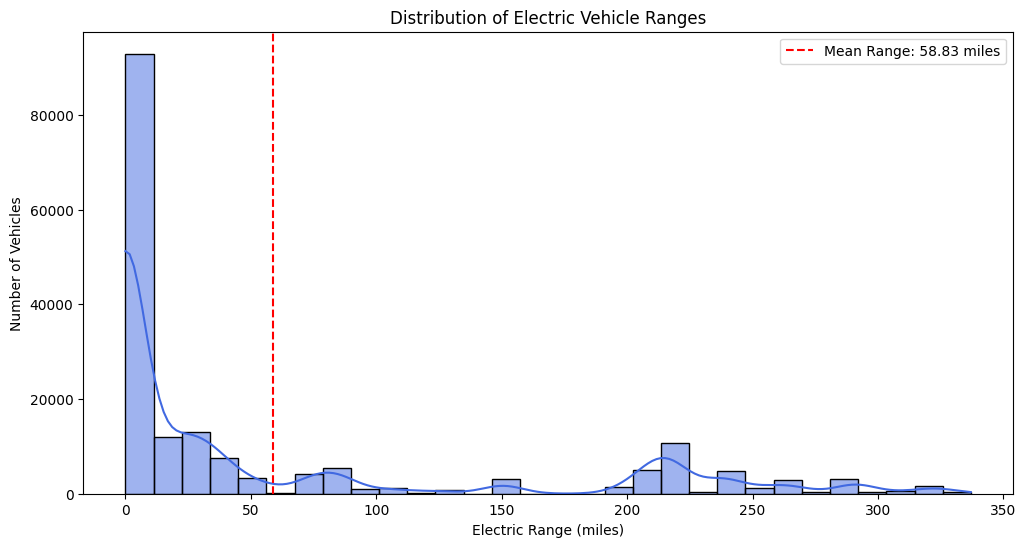

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

## Average Electric Range by Model Year

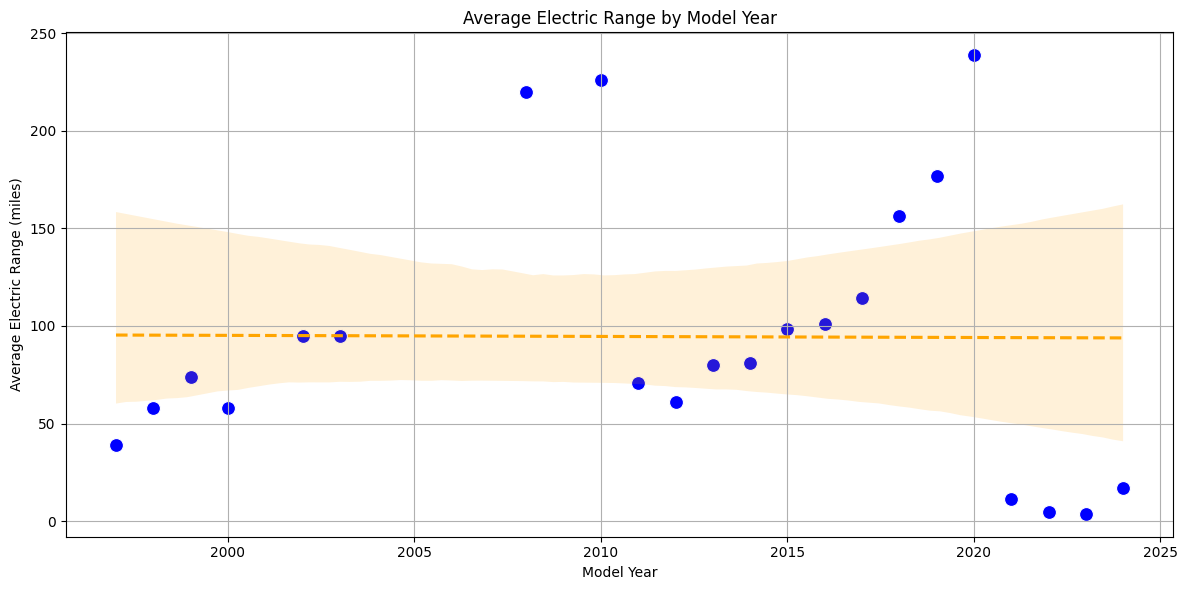

In [31]:
# Calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Scatter plot for individual data points
sns.scatterplot(x='Model Year', y='Electric Range', data=average_range_by_year, color='blue', s=100, marker='o')

# Adding a trendline to show the overall trend
sns.regplot(x='Model Year', y='Electric Range', data=average_range_by_year, scatter=False, color='orange', line_kws={"linestyle": "--"})

plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.tight_layout()
plt.show()


##

## Average Electric Range in Top Makes

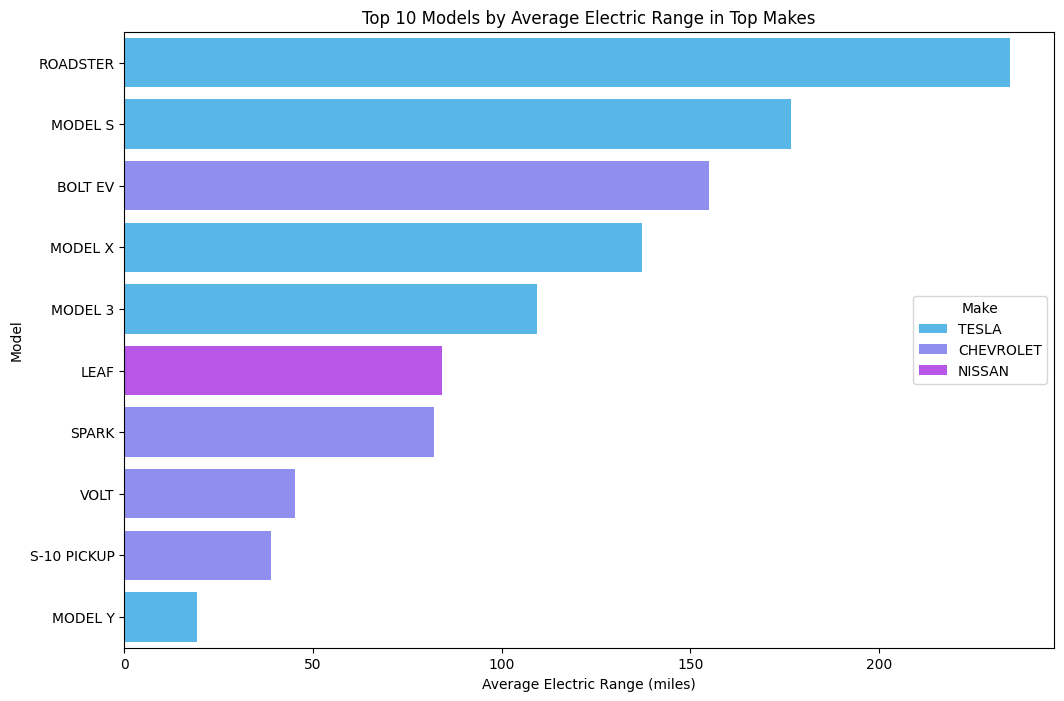

In [46]:
# The top 10 models with the highest average electric range
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()


## **Estimated Market Size Analysis of Electric Vehicles in the United States**

In [47]:
# calculating the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

,count
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,19
2010,23
2011,775


In [48]:
import numpy as np

# Filtering the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# Preparing the data for fitting by log-transforming y_data to linearize the exponential growth
x_data = filtered_years.index
y_data = np.log(filtered_years.values)

# Using numpy polyfit to fit a line to the log-transformed data (1st degree polynomial fit)
coeffs = np.polyfit(x_data, y_data, 1)

# Defining the exponential growth model using the fitted coefficients
def exp_growth_simple(x, a, b):
    return np.exp(a * x + b)

# Forecasting for 2024 and the next five years using the fitted model
forecast_years = np.arange(2024, 2024 + 6)
forecasted_values = exp_growth_simple(forecast_years, *coeffs)

# Creating a dictionary to display the forecasted values
forecasted_evs = dict(zip(forecast_years, forecasted_values))

print(forecasted_evs)


{2024: 125219.69354168883, 2025: 196721.4523614775, 2026: 309051.46566525876, 2027: 485523.0951341701, 2028: 762761.8765736327, 2029: 1198306.9110097692}


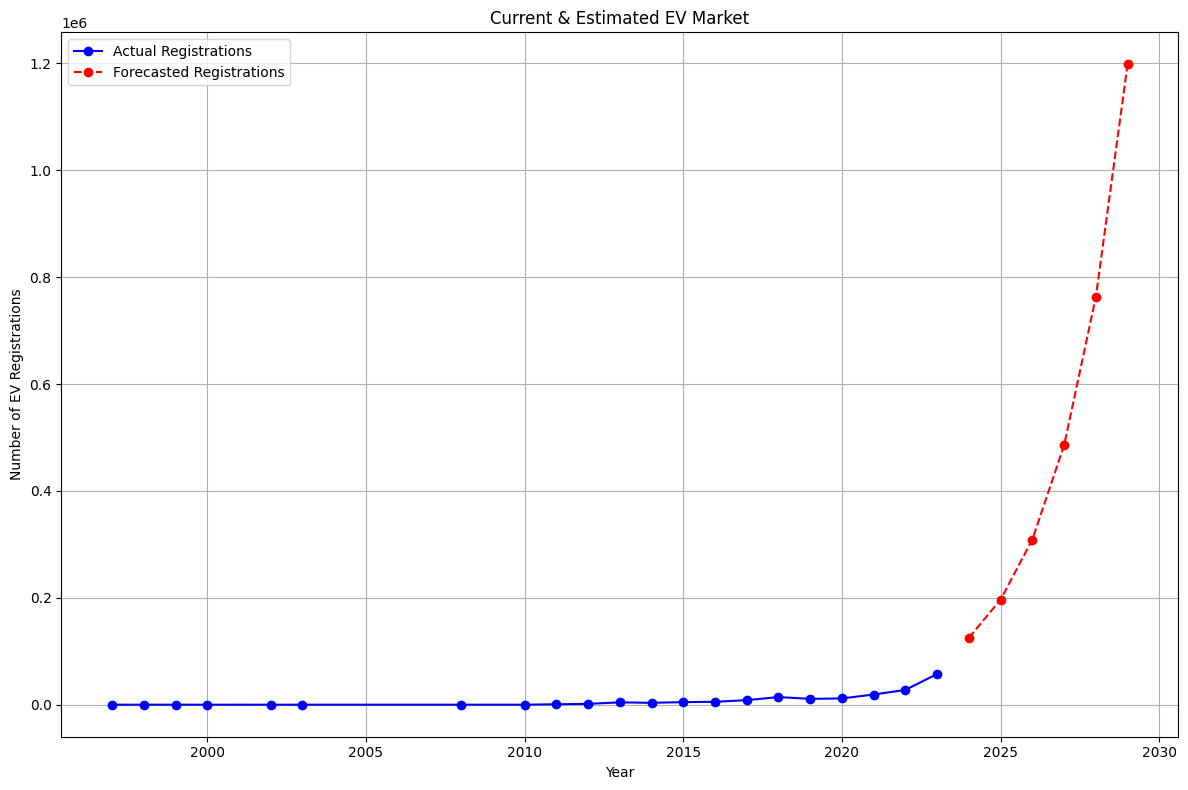

In [49]:
# Preparing data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# Actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = exp_growth_simple(forecast_years_full, *coeffs)

plt.figure(figsize=(12, 8))

# Plotting actual registrations
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')

# Plotting forecasted registrations
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
